In [2]:
import torch
import matplotlib.pyplot as plt

$p(x) = 1 - 2x^2$

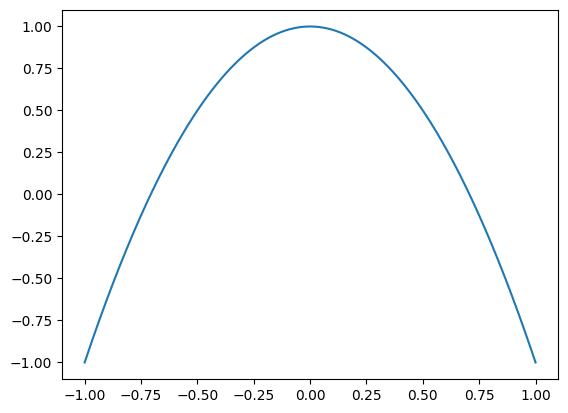

In [55]:
x = torch.linspace(-1,1,10000).reshape((-1,1))
y = 1 - 2 * x ** 2
def f(x): return 1 - 2 * x ** 2
plt.plot(x, y);

In [42]:
W1 = torch.randn((1, 6))
b1 = torch.randn((6))
W2 = torch.randn((5, 1))
b2 = torch.randn((1))
pre_z1 = x @ W1 + b1
z1 = torch.cat((pre_z1[:, 0][:, None], torch.sin(pre_z1[:, 1][:, None]), torch.cos(
    pre_z1[:, 2][:, None]), torch.sigmoid(pre_z1[:, 3][:, None]), pre_z1[:, 4][:, None] * pre_z1[:, 5][:, None]), 1)
z2 = z1 @ W2 + b2
z2.shape
parameters = [W1, b1, W2, b2]

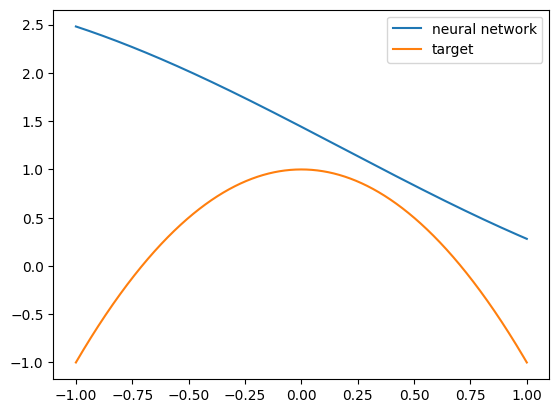

In [39]:
plt.plot(x, z2, label='neural network')
plt.plot(x, y, label='target')
plt.legend();

In [43]:
# regularization = 0.1
# norm = torch.zeros((1))
# for p in parameters:
#     norm += p.abs().sum()
loss = ((z2 - y) ** 2).mean(0) # + regularization * sum([p.abs().sum() for p in parameters])
loss

tensor([10.5225])

In [53]:
# for p in parameters:
#     p.requires_grad = True
def forward(x, parameters):
    W1, b1, W2, b2 = parameters
    pre_z1 = x @ W1 + b1
    z1 = torch.cat((pre_z1[:, 0][:, None], torch.sin(pre_z1[:, 1][:, None]), torch.cos(
        pre_z1[:, 2][:, None]), torch.sigmoid(pre_z1[:, 3][:, None]), pre_z1[:, 4][:, None] * pre_z1[:, 5][:, None]), 1)
    z2 = z1 @ W2 + b2
    return z2
    
learning_rate = 0.01
batch_size = 32
for _ in range(1000):
    ix = torch.randint(0,len(x), (batch_size,))
    x_batch = x[ix]
    y_batch = y[ix]

    y_hat = forward(x_batch, parameters)

    loss = ((y_hat - y_batch) ** 2).mean(0)

    for p in parameters:
        p.grad = None
    loss.backward()

    for p in parameters:
        with torch.no_grad():
            p += -learning_rate * p.grad
    print(loss)


tensor([0.0051], grad_fn=<MeanBackward1>)
tensor([0.0083], grad_fn=<MeanBackward1>)
tensor([0.0056], grad_fn=<MeanBackward1>)
tensor([0.0059], grad_fn=<MeanBackward1>)
tensor([0.0033], grad_fn=<MeanBackward1>)
tensor([0.0053], grad_fn=<MeanBackward1>)
tensor([0.0054], grad_fn=<MeanBackward1>)
tensor([0.0054], grad_fn=<MeanBackward1>)
tensor([0.0052], grad_fn=<MeanBackward1>)
tensor([0.0051], grad_fn=<MeanBackward1>)
tensor([0.0056], grad_fn=<MeanBackward1>)
tensor([0.0059], grad_fn=<MeanBackward1>)
tensor([0.0100], grad_fn=<MeanBackward1>)
tensor([0.0045], grad_fn=<MeanBackward1>)
tensor([0.0054], grad_fn=<MeanBackward1>)
tensor([0.0027], grad_fn=<MeanBackward1>)
tensor([0.0044], grad_fn=<MeanBackward1>)
tensor([0.0055], grad_fn=<MeanBackward1>)
tensor([0.0039], grad_fn=<MeanBackward1>)
tensor([0.0047], grad_fn=<MeanBackward1>)
tensor([0.0052], grad_fn=<MeanBackward1>)
tensor([0.0065], grad_fn=<MeanBackward1>)
tensor([0.0042], grad_fn=<MeanBackward1>)
tensor([0.0025], grad_fn=<MeanBack

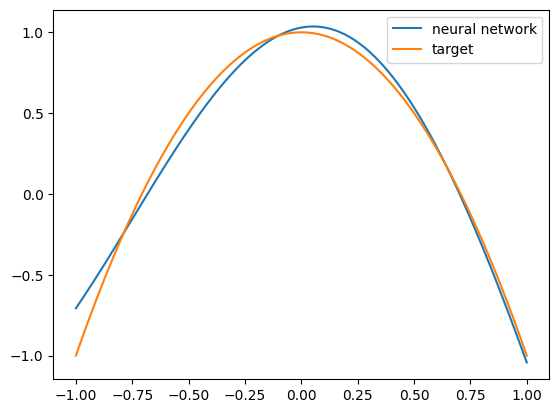

In [54]:
plt.plot(x, z2.detach(), label='neural network')
plt.plot(x, y, label='target')
plt.legend()


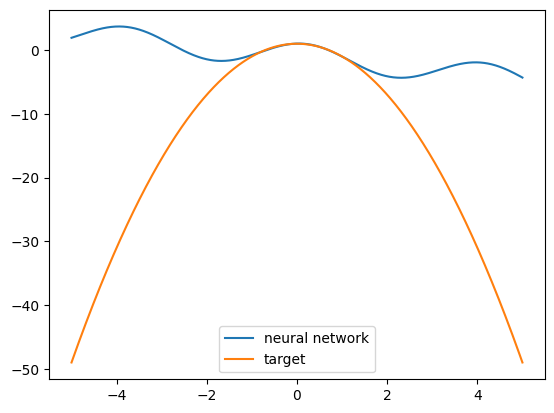

In [57]:
x2 = torch.linspace(-5,5,1000).reshape((-1, 1))
y2 = forward(x2, parameters).detach()

plt.plot(x2, y2, label='neural network')
plt.plot(x2, f(x2), label='target')
plt.legend()
